
# Machine Learning Model for Predicting IL-6 Inducing Peptides

In [ ]:
#Supervised Learning - Labeled Data
#Classification Model- Algorithms

In [55]:
import os
import pandas as pd
import numpy as np

In [57]:
os.chdir("/home/ubuntu/Downloads/CNN")   #Define Path to file

In [58]:
#Dataset generation and feature engineering/generation

In [59]:
df = pd.read_csv("dataset_shuf.csv")
df

,class,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
0,neg,0.00,0.0,20.00,6.67,6.67,6.67,13.33,6.67,0.00,...,0.00,6.67,0.00,0.00,6.67,0.00,0.00,6.67,0.00,0.00
1,neg,0.00,0.0,0.00,0.00,6.67,20.00,0.00,13.33,6.67,...,0.00,6.67,6.67,0.00,0.00,0.00,0.00,13.33,13.33,6.67
2,pos,13.04,0.0,4.35,4.35,13.04,0.00,0.00,8.70,13.04,...,0.00,13.04,0.00,0.00,8.70,0.00,4.35,0.00,0.00,4.35
3,pos,0.00,0.0,11.11,33.33,0.00,0.00,0.00,11.11,22.22,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,pos,20.00,0.0,20.00,6.67,0.00,0.00,0.00,0.00,13.33,...,13.33,6.67,0.00,0.00,6.67,0.00,6.67,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,neg,20.00,0.0,6.67,6.67,13.33,6.67,6.67,13.33,0.00,...,0.00,0.00,6.67,0.00,0.00,6.67,0.00,0.00,0.00,6.67
196,pos,0.00,0.0,6.67,6.67,6.67,0.00,0.00,0.00,0.00,...,0.00,13.33,13.33,0.00,0.00,6.67,0.00,13.33,0.00,20.00
197,neg,6.67,0.0,0.00,0.00,6.67,6.67,6.67,0.00,0.00,...,0.00,6.67,0.00,0.00,0.00,20.00,26.67,13.33,0.00,0.00
198,neg,6.67,0.0,0.00,33.33,0.00,0.00,0.00,13.33,0.00,...,0.00,13.33,13.33,6.67,0.00,0.00,6.67,0.00,0.00,0.00


array([[<Axes: title={'center': 'A'}>, <Axes: title={'center': 'C'}>,
        <Axes: title={'center': 'D'}>, <Axes: title={'center': 'E'}>],
       [<Axes: title={'center': 'F'}>, <Axes: title={'center': 'G'}>,
        <Axes: title={'center': 'H'}>, <Axes: title={'center': 'I'}>],
       [<Axes: title={'center': 'K'}>, <Axes: title={'center': 'L'}>,
        <Axes: title={'center': 'M'}>, <Axes: title={'center': 'N'}>],
       [<Axes: title={'center': 'P'}>, <Axes: title={'center': 'Q'}>,
        <Axes: title={'center': 'R'}>, <Axes: title={'center': 'S'}>],
       [<Axes: title={'center': 'T'}>, <Axes: title={'center': 'V'}>,
        <Axes: title={'center': 'W'}>, <Axes: title={'center': 'Y'}>]],
      dtype=object)

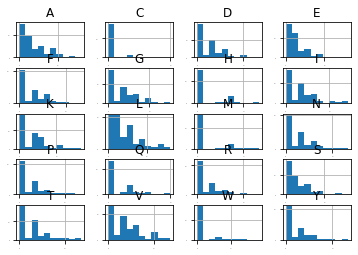

In [60]:
df.hist(sharex = False, sharey = False, xlabelsize = 1, ylabelsize = 1)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <A

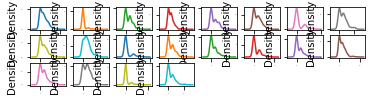

In [61]:
#Density
df.plot(kind="density", subplots = True, layout= (8,8), sharex = False, legend = False, fontsize = 1)

In [62]:
#Splitting the datasets X and Y
X= df.iloc[:,1:21]
X

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0.00,0.0,20.00,6.67,6.67,6.67,13.33,6.67,0.00,20.00,0.00,6.67,0.00,0.00,6.67,0.00,0.00,6.67,0.00,0.00
1,0.00,0.0,0.00,0.00,6.67,20.00,0.00,13.33,6.67,6.67,0.00,6.67,6.67,0.00,0.00,0.00,0.00,13.33,13.33,6.67
2,13.04,0.0,4.35,4.35,13.04,0.00,0.00,8.70,13.04,13.04,0.00,13.04,0.00,0.00,8.70,0.00,4.35,0.00,0.00,4.35
3,0.00,0.0,11.11,33.33,0.00,0.00,0.00,11.11,22.22,22.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,20.00,0.0,20.00,6.67,0.00,0.00,0.00,0.00,13.33,6.67,13.33,6.67,0.00,0.00,6.67,0.00,6.67,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,20.00,0.0,6.67,6.67,13.33,6.67,6.67,13.33,0.00,6.67,0.00,0.00,6.67,0.00,0.00,6.67,0.00,0.00,0.00,6.67
196,0.00,0.0,6.67,6.67,6.67,0.00,0.00,0.00,0.00,13.33,0.00,13.33,13.33,0.00,0.00,6.67,0.00,13.33,0.00,20.00
197,6.67,0.0,0.00,0.00,6.67,6.67,6.67,0.00,0.00,6.67,0.00,6.67,0.00,0.00,0.00,20.00,26.67,13.33,0.00,0.00
198,6.67,0.0,0.00,33.33,0.00,0.00,0.00,13.33,0.00,6.67,0.00,13.33,13.33,6.67,0.00,0.00,6.67,0.00,0.00,0.00


In [63]:
y = df.iloc[:,0]
y

0      neg
1      neg
2      pos
3      pos
4      pos
      ... 
195    neg
196    pos
197    neg
198    neg
199    neg
Name: class, Length: 200, dtype: object

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [66]:
X_train

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
108,13.33,0.0,13.33,0.00,6.67,6.67,0.00,6.67,0.00,6.67,0.00,6.67,0.00,0.00,6.67,20.00,0.00,13.33,0.00,0.00
107,26.67,0.0,6.67,0.00,0.00,0.00,6.67,6.67,0.00,13.33,0.00,6.67,0.00,6.67,0.00,0.00,6.67,6.67,0.00,13.33
189,0.00,5.0,0.00,5.00,0.00,30.00,0.00,0.00,0.00,10.00,0.00,0.00,10.00,5.00,0.00,10.00,10.00,10.00,5.00,0.00
14,20.00,0.0,0.00,6.67,6.67,0.00,6.67,6.67,6.67,13.33,0.00,0.00,0.00,0.00,0.00,6.67,6.67,6.67,0.00,13.33
56,10.00,0.0,10.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,20.00,20.00,20.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,7.14,0.0,0.00,14.29,0.00,0.00,0.00,7.14,21.43,0.00,0.00,0.00,14.29,7.14,0.00,7.14,14.29,7.14,0.00,0.00
137,20.00,0.0,0.00,0.00,13.33,13.33,0.00,0.00,0.00,0.00,6.67,13.33,0.00,0.00,6.67,0.00,6.67,20.00,0.00,0.00
72,0.00,0.0,11.11,0.00,0.00,0.00,0.00,0.00,11.11,11.11,0.00,0.00,22.22,0.00,0.00,0.00,11.11,22.22,11.11,0.00
140,22.22,0.0,0.00,0.00,11.11,22.22,11.11,0.00,0.00,11.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.22,0.00,0.00


In [67]:
Y_validation

58     pos
40     neg
34     pos
102    pos
184    neg
198    neg
95     pos
4      pos
29     neg
168    neg
171    pos
18     pos
11     neg
89     pos
110    pos
118    neg
159    pos
35     pos
136    neg
59     pos
51     neg
16     neg
44     pos
94     neg
31     neg
162    pos
38     pos
28     neg
193    pos
27     neg
47     neg
165    pos
194    pos
177    pos
176    neg
97     neg
174    neg
73     pos
69     neg
172    neg
Name: class, dtype: object

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [77]:
num_fold = 5
scoring = "accuracy"

In [78]:
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [79]:
results =[]
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=num_fold, random_state=5, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LDA: 0.643750 (0.101934)
KNN: 0.625000 (0.059293)
CART: 0.612500 (0.093958)
NB: 0.525000 (0.063738)
SVM: 0.581250 (0.091856)


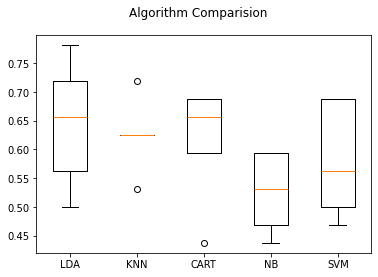

In [81]:
import matplotlib
from matplotlib import pyplot
fig = pyplot.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

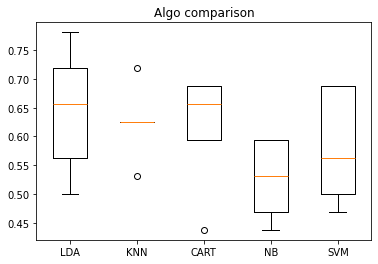

In [82]:
#compare algorithm
from matplotlib import pyplot
pyplot.boxplot(results,labels=names)
pyplot.title('Algo comparison')
pyplot.show()


In [83]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)


In [84]:
predictions

array(['neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg',
       'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg',
       'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos',
       'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg',
       'neg', 'neg', 'neg', 'neg'], dtype=object)

In [85]:
Y_validation

58     pos
40     neg
34     pos
102    pos
184    neg
198    neg
95     pos
4      pos
29     neg
168    neg
171    pos
18     pos
11     neg
89     pos
110    pos
118    neg
159    pos
35     pos
136    neg
59     pos
51     neg
16     neg
44     pos
94     neg
31     neg
162    pos
38     pos
28     neg
193    pos
27     neg
47     neg
165    pos
194    pos
177    pos
176    neg
97     neg
174    neg
73     pos
69     neg
172    neg
Name: class, dtype: object

In [86]:
# Evaluate predictions        (Just to measure the performance, effictiveness, and accuracy of trained model, to ensure that how well the model is performs on inseen data and guide improvements)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.525
[[20  0]
 [19  1]]
              precision    recall  f1-score   support

         neg       0.51      1.00      0.68        20
         pos       1.00      0.05      0.10        20

    accuracy                           0.53        40
   macro avg       0.76      0.53      0.39        40
weighted avg       0.76      0.53      0.39        40

